In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,6,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem, dados_categoricos

(      Mohs Hardness  Specific Gravity  Refractive Index  Dispersion  \
 0              4.50             3.240             1.580         0.0   
 1              2.75             3.446             1.592         0.0   
 2              2.00             4.420             2.085         0.0   
 3              0.00             0.000             0.000         0.0   
 4              5.50             1.050             1.634         0.0   
 ...             ...               ...               ...         ...   
 3107           0.00             0.000             0.000         0.0   
 3108           0.00             0.000             0.000         0.0   
 3109           0.00             0.000             0.000         0.0   
 3110           0.00             0.000             0.000         0.0   
 3111           0.00             0.000             0.000         0.0   
 
        Molar Mass  Molar Volume  Calculated Density  
 0      817.339002      0.123390               5.498  
 1      435.069330      

In [2]:
tamanho = 0.25 # Fração de dados escolhida para treino e teste
seed = 567

i = df_chem.index
i_treino, i_teste = train_test_split(i, test_size=tamanho, random_state = seed)

df_treino = df_chem.loc[i_treino]
df_teste = df_chem.loc[i_teste]

print(df_treino)
print()
print(df_teste)

      Mohs Hardness  Specific Gravity  Refractive Index  Dispersion  \
3065            0.0               0.0             0.000         0.0   
1670            0.0               0.0             0.000         0.0   
2698            0.0               0.0             0.000         0.0   
123             0.0               0.0             0.000         0.0   
263             6.5               0.0             1.578         0.0   
...             ...               ...               ...         ...   
2064            0.0               0.0             0.000         0.0   
2953            0.0               0.0             0.000         0.0   
1580            0.0               0.0             0.000         0.0   
2031            0.0               0.0             0.000         0.0   
2932            0.0               0.0             0.000         0.0   

       Molar Mass  Molar Volume  Calculated Density  
3065   175.009500      0.033657               4.316  
1670   523.533626      0.190498        

In [3]:
# Modelo preditivo para Regressão Linear

nome = 'df_chem'
atributos = ["Specific Gravity", "Refractive Index", "Mohs Hardness", "Dispersion", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]

X_treino = df_treino.reindex(atributos, axis=1).values
y_treino = df_treino.reindex(target, axis=1).values
X_teste = df_teste.reindex(atributos, axis=1).values
y_teste = df_teste.reindex(target, axis=1).values

In [4]:
# Modelo linear para compararmos com nossa Baseline

linear = LinearRegression() # Criação do Modelo Linear

linear.fit(X_treino, y_treino) # Treinamento do Modelo Linear

previsao_linear = linear.predict(X_teste) # Previsão do modelo linear a partir do treino

#print(previsao_linear)

In [5]:
print(linear.__doc__)
print(linear.fit.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.

    copy_X : bool, default=True
        If True, X will be copie

In [6]:
# Comparação se foi melhor ou não

y_verdadeiro = y_teste
y_previsao = linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f'A RMSE do modelo linear foi uma Indice Refrativo de {RMSE}')

A RMSE do modelo linear foi uma Indice Refrativo de 1.2503674243230045e-14


##### Em comparação com o modelo baseline, o RMSE da Regressão Linear foi absurdamente menor.

Text(0, 0.5, 'Previsão')

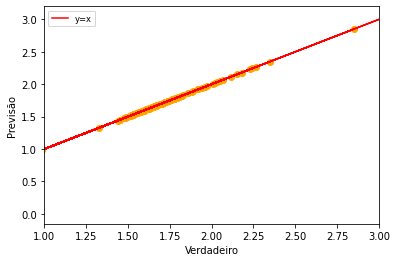

In [7]:
# Visualização da Regressão Linear

import matplotlib.pyplot as plt
fig, ax2 = plt.subplots(1,1)
ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')
ax2.set_xlim(1,3)
if target ==  'Refractive Index':
    ax2.set_title('')
ax2.set_xlabel('Verdadeiro')
ax2.set_ylabel('Previsão')

In [8]:
print(ax2.scatter.__doc__, ax2.set_xlim)

A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to be
    colormapped. If you want to specify the same RGB or RGBA value for
    all points, use a 2D array with a single row.  Otherwise, value-
    matching will have precedence in case of a size matching with *x*
    and *y*.

    If you wish to specify a 

### Regressão Linear com os dados normalizados

In [9]:
# Função para normalizar os dados
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado

In [10]:
df_normalizado = normalizar(df_chem)
df_normalizado

,Mohs Hardness,Specific Gravity,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
0,0.473684,0.337746,0.467041,0.0,0.057323,0.057586,0.389835
1,0.289474,0.359220,0.470588,0.0,0.030480,0.023090,0.457480
2,0.210526,0.460753,0.616317,0.0,0.064609,0.057197,0.442743
3,0.000000,0.000000,0.000000,0.0,0.038552,0.011597,0.969592
4,0.578947,0.109455,0.483003,0.0,0.060402,0.051786,0.453095
...,...,...,...,...,...,...,...
3107,0.000000,0.000000,0.000000,0.0,0.047475,0.028843,0.594781
3108,0.000000,0.000000,0.000000,0.0,0.070548,0.137955,0.208756
3109,0.000000,0.000000,0.000000,0.0,0.072792,0.086328,0.339587
3110,0.000000,0.000000,0.000000,0.0,0.015775,0.023056,0.234994


In [11]:
tamanho = 0.25 # Fração de dados escolhida para treino e teste
seed = 2000

i = df_normalizado.index
i_treino, i_teste = train_test_split(i, test_size=tamanho, random_state = seed)

df_treino = df_normalizado.loc[i_treino]
df_teste = df_normalizado.loc[i_teste]

print(df_treino)
print()
print(df_teste)

      Mohs Hardness  Specific Gravity  Refractive Index  Dispersion  \
2205       0.000000          0.000000           0.00000         0.0   
2211       0.000000          0.000000           0.00000         0.0   
491        0.000000          0.000000           0.00000         0.0   
452        0.605263          0.370062           0.49394         0.0   
1502       0.000000          0.000000           0.00000         0.0   
...             ...               ...               ...         ...   
1659       0.000000          0.000000           0.00000         0.0   
1590       0.000000          0.000000           0.00000         0.0   
1230       0.000000          0.000000           0.00000         0.0   
840        0.000000          0.000000           0.00000         0.0   
2998       0.000000          0.000000           0.00000         0.0   

      Molar Mass  Molar Volume  Calculated Density  
2205    0.108428      0.109272            0.405722  
2211    0.019108      0.057531           

In [12]:
# Modelo preditivo de regressão linear normalizado

nome = 'df_normalizado'
atributos = ["Mohs Hardness","Specific Gravity", "Refractive Index", "Dispersion", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]

X_treinoN = df_treino.reindex(atributos, axis=1).values
y_treinoN = df_treino.reindex(target, axis=1).values
X_testeN = df_teste.reindex(atributos, axis=1).values
y_testeN = df_teste.reindex(target, axis=1).values

In [13]:
linear = LinearRegression() # Criação do Modelo Linear

linear.fit(X_treinoN, y_treinoN) # Treinamento do Modelo Linear

previsao_linear = linear.predict(X_testeN) # Previsão do modelo linear a partir do treino

#print(previsao_linear)

In [14]:
# Raiz quadrada do erro quadrático médio para a regressão normalizada

y_verdadeiroN = y_testeN
y_previsaoN = linear.predict(X_testeN)

RMSE = mean_squared_error(y_verdadeiroN, y_previsaoN, squared=False)
print(f'A RMSE de Regressão linear normalizada foi uma Indice Refrativo de {RMSE}')

A RMSE de Regressão linear normalizada foi uma Indice Refrativo de 1.4808932342353373e-15


**Com relação ao RMSE do modelo baseline, houve uma redução ainda maior**

Text(0, 0.5, 'Previsão')

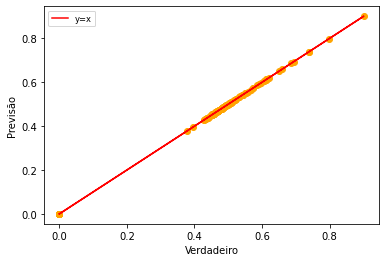

In [15]:
fig, ax2 = plt.subplots(1,1)
ax2.scatter(y_verdadeiroN, y_previsaoN, c = 'orange')
ax2.plot(y_verdadeiroN,y_verdadeiroN,label="y=x", c = 'r') ; ax2.legend(fontsize='small')
if target ==  'Refractive Index':
    ax2.set_title('')
ax2.set_xlabel('Verdadeiro')
ax2.set_ylabel('Previsão')